# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,364,87,45,77,153,59,7,154,44,19,145,181,350,172,75,15,14,184,189
1,61,77,38,63,135,59,5,130,52,18,130,145,247,139,79,13,21,183,187
2,77,86,40,62,140,62,7,150,45,19,133,165,330,173,82,2,3,180,185
3,176,84,39,90,180,60,7,177,37,21,131,209,469,145,71,4,38,190,198
4,109,99,48,79,199,68,6,185,35,22,153,202,524,171,74,5,8,195,195
5,589,104,55,105,223,70,10,223,30,25,177,237,737,218,75,14,11,188,196
6,301,93,43,78,166,59,7,151,44,19,141,182,342,174,68,15,2,193,197
7,702,96,48,83,177,59,8,171,39,21,152,195,438,196,67,15,0,195,201
8,453,95,43,71,159,64,6,145,45,19,141,169,322,171,67,8,4,195,200
9,241,93,45,73,164,59,7,159,42,20,146,182,379,188,65,11,15,195,201


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.265938,93.540984,44.843352,81.850638,168.907104,61.914390,8.624772,168.510018,41.003643,20.562842,148.094718,188.366120,437.834244,174.925319,72.595628,6.453552,12.845173,188.839709,195.550091
std,242.461402,8.260840,6.071732,15.575912,34.537831,8.598397,4.872967,33.124274,7.726388,2.584726,14.293270,31.745435,176.679841,32.141508,7.688059,4.931662,9.256862,6.098626,7.475736
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,113.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,406.000000,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,177.000000,364.000000,174.000000,71.000000,6.000000,11.000000,189.000000,196.000000
75%,622.000000,99.000000,49.000000,96.000000,194.000000,66.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,579.000000,196.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,204.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
### YOUR CODE HERE

# ниже используется логистическая регрессия -- линейная модель, а для них нужна
# нормировка данных, так как это поможет избежать разных масштабов у признаков, что
# может повлиять на учитывание их важности, поможет найти зависимые признакм 
# (вспомним про пример, где были рубли и копейки)
# можно использовать standard scaler

# также надо закодировать значения целевой переменной -- класса автомобиля

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
pd.DataFrame(X_train).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,364,87,45,77,153,59,7,154,44,19,145,181,350,172,75,15,14,184,189
1,61,77,38,63,135,59,5,130,52,18,130,145,247,139,79,13,21,183,187


In [7]:
sc = StandardScaler().fit(X_train, y_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
pd.DataFrame(X_train).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.215761,-0.792528,0.025823,-0.311703,-0.460990,-0.339255,-0.333730,-0.438447,0.388162,-0.605196,-0.216713,-0.232249,-0.497591,-0.091097,0.313026,1.734556,0.124867,-0.794297,-0.876979
1,-1.466584,-2.004163,-1.128112,-1.211347,-0.982633,-0.339255,-0.744532,-1.163652,1.424519,-0.992438,-1.267115,-1.367304,-1.081098,-1.118743,0.833788,1.328643,0.881753,-0.958418,-1.144755


In [9]:
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)

In [10]:
y_test = le.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [11]:
### YOUR CODE HERE

# task 1: optim hyperparams
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [12]:
# import sklearn
# print(sorted(sklearn.metrics.SCORERS.keys()))
# 'accuracy', 'f1_macro'

In [13]:
%%time

log_reg_cv_f1 = GridSearchCV(
    LogisticRegression(
        multi_class='multinomial',
        solver='saga', 
        max_iter=500,
        tol=1e-3
    ),
    cv=5,
    param_grid={
        'penalty': ['l1', 'l2', 'none'],
        'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
        'fit_intercept': [True, False],
        'random_state': [42]
    },
    n_jobs=-1,
    scoring='f1_macro', 
    verbose=1
).fit(X_train, y_train)

model = log_reg_cv_f1.best_estimator_
print('best score :', log_reg_cv_f1.best_score_)
print('best params :', log_reg_cv_f1.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best score : 0.8000222587294669
best params : {'C': 0.01, 'fit_intercept': True, 'penalty': 'none', 'random_state': 42}
Wall time: 4.42 s


c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [15]:
### YOUR CODE HERE

# task 2: metrics
from sklearn.metrics import accuracy_score, f1_score

print('Train')
print('f1 score :', f1_score(y_train, model.predict(X_train), average='weighted'))
print('accuracy :', accuracy_score(y_train, model.predict(X_train)))

print('Test')
print('f1 score :', f1_score(y_test, model.predict(X_test), average='weighted'))
print('accuracy :', accuracy_score(y_test, model.predict(X_test)))

Train
f1 score : 0.8504872063921354
accuracy : 0.8524590163934426
Test
f1 score : 0.7566253530054865
accuracy : 0.7609427609427609


In [16]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

!pip install scikit-plot


[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

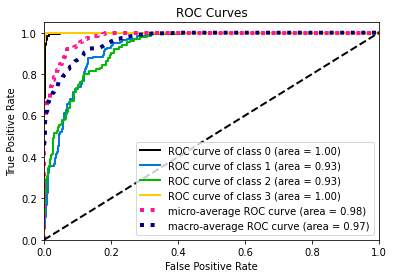

In [17]:
### YOUR CODE HERE

# task 3: roc curve
from scikitplot.metrics import plot_roc

plot_roc(y_train, model.predict_proba(X_train))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

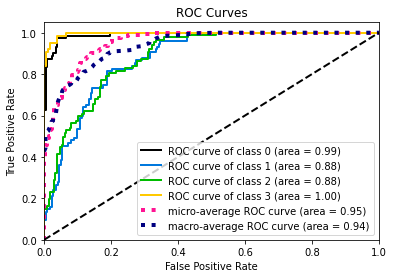

In [18]:
plot_roc(y_test, model.predict_proba(X_test))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [19]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

we have 19 components
var_ratio almost doesn't change after 10 components
var ratio for 10 components is 0.9893


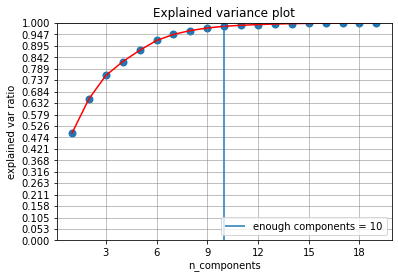

In [20]:
import matplotlib.pyplot as plt

var_ratios = pca.explained_variance_ratio_.cumsum()
enough = 0.005
n_enough = 1
while n_enough < pca.n_components_ and \
      (var_ratios[n_enough] - var_ratios[n_enough-1]) / var_ratios[n_enough-1] > enough:
    n_enough += 1

print('we have', pca.n_components_, 'components')
print("var_ratio almost doesn't change after", n_enough, 'components')
print('var ratio for', n_enough, 'components is', np.round(var_ratios[n_enough], decimals=4))

plt.title('Explained variance plot')
plt.xlabel('n_components')
plt.ylabel('explained var ratio')

plt.xticks(ticks=range(0, pca.n_components_ + 1, 3))
plt.yticks(ticks=np.linspace(0, 1, 20))
plt.ylim(0, 1)
plt.grid(which='major', axis='both', color='grey', linestyle='-', linewidth=0.5)

plt.plot(range(1, pca.n_components_ + 1), var_ratios, 'r');
plt.scatter(range(1, pca.n_components_ + 1), var_ratios, linewidths=2);
plt.vlines(n_enough, ymin=0, ymax=1, label=f'enough components = {n_enough}')

plt.legend(loc='lower right');

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [21]:
### YOUR CODE HERE

# данные уже были стандартизованы, поэтому нормировать их не надо
# число компонент выбрано из условия, что если взять на одну компоненту 
# меньше, то относительная разница в объясненной дисперсии не более 1%
# так получили 9 компонент

pca = PCA(n_components=n_enough).fit(X_train) # --> log reg accuracy, f1 ~ 0.72
# pca = PCA(n_components=14).fit(X_train) # --> log reg accuracy, f1 ~ 0.79
print(pca.n_components_)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

10


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [22]:
%%time
### YOUR CODE HERE

log_reg_cv_f1_pca_features = GridSearchCV(
    LogisticRegression(
        multi_class='multinomial',
        solver='saga', tol=1e-3
    ),
    cv=3,
    param_grid={
        'penalty': ['l1', 'l2'],
        'C': [1e-2, 1e-1, 5e-1, 1, 2, 5, 10, 100],
        'random_state': [42],
        'fit_intercept': [True, False],
        'max_iter': [50, 100, 200, 400, 500]
    },
    n_jobs=-1,
    scoring='f1_weighted', 
    verbose=1
).fit(X_train_pca, y_train)

model = log_reg_cv_f1_pca_features.best_estimator_
print('best score :', log_reg_cv_f1_pca_features.best_score_)
print('best params :', log_reg_cv_f1_pca_features.best_params_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
best score : 0.7123094744692383
best params : {'C': 10, 'fit_intercept': True, 'max_iter': 400, 'penalty': 'l1', 'random_state': 42}
Wall time: 1.39 s


In [23]:
print('Train')
print('f1 score :', f1_score(y_train, model.predict(X_train_pca), average='weighted'))
print('accuracy :', accuracy_score(y_train, model.predict(X_train_pca)))

print('Test')
print('f1 score :', f1_score(y_test, model.predict(X_test_pca), average='weighted'))
print('accuracy :', accuracy_score(y_test, model.predict(X_test_pca)))

Train
f1 score : 0.7328187577957709
accuracy : 0.7395264116575592
Test
f1 score : 0.6284973730867449
accuracy : 0.6430976430976431


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

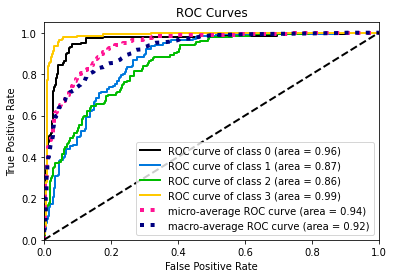

In [24]:
plot_roc(y_train, model.predict_proba(X_train_pca))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

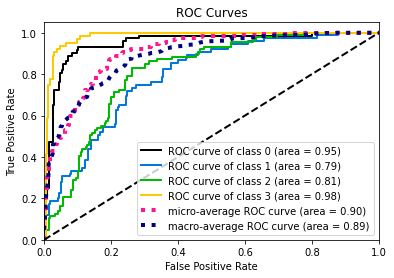

In [25]:
plot_roc(y_test, model.predict_proba(X_test_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [26]:
%%time
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
grid_cv_tree = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid={'max_depth': [2, 3, 5, 7, 8, 9, 10]},
    cv=5,
    n_jobs=-1
).fit(X_train_pca, y_train)
    
model = grid_cv_tree.best_estimator_
print('best score :', grid_cv_tree.best_score_)
print('best params :', grid_cv_tree.best_params_)


best score : 0.5992160133444537
best params : {'max_depth': 9}
Wall time: 100 ms


In [27]:
print('Train')
print('f1 score :', f1_score(y_train, model.predict(X_train_pca), average='weighted'))
print('accuracy :', accuracy_score(y_train, model.predict(X_train_pca)))

print('Test')
print('f1 score :', f1_score(y_test, model.predict(X_test_pca), average='weighted'))
print('accuracy :', accuracy_score(y_test, model.predict(X_test_pca)))

Train
f1 score : 0.9358070977963062
accuracy : 0.936247723132969
Test
f1 score : 0.6249292169698069
accuracy : 0.6296296296296297


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [28]:
log_reg_cv_f1_pca_features.best_params_

{'C': 10,
 'fit_intercept': True,
 'max_iter': 400,
 'penalty': 'l1',
 'random_state': 42}

In [30]:
from sklearn.ensemble import BaggingClassifier

N_min, N_max, step = 2, 100, 5

f1_tree, f1_lr = [], []
acc_tree, acc_lr = [], []

for N in range(N_min, N_max, step):
    lr = BaggingClassifier(
        base_estimator=LogisticRegression(
            C=10, fit_intercept=True, max_iter=400, penalty='l1', random_state=42, solver='saga'),
        n_estimators=N,
        bootstrap=True
    ).fit(X_train_pca, y_train)
    
    tree = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=9),
        n_estimators=N,
        bootstrap=True
    ).fit(X_train_pca, y_train)
    
    lr_pred = lr.predict(X_test_pca)
    tree_pred = tree.predict(X_test_pca)
    
    f1_tree.append(f1_score(y_test, tree_pred, average='weighted'))
    f1_lr.append(f1_score(y_test, lr_pred, average='weighted'))
    acc_tree.append(accuracy_score(y_test, tree_pred))
    acc_lr.append(accuracy_score(y_test, lr_pred))

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\виктор мельников\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergence

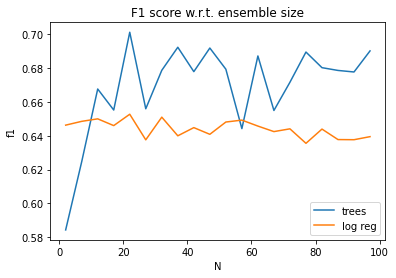

In [31]:
plt.title('F1 score w.r.t. ensemble size')
plt.xlabel('N')
plt.ylabel('f1')
plt.plot(range(N_min, N_max, step), f1_tree, label='trees')
plt.plot(range(N_min, N_max, step), f1_lr, label='log reg')
plt.legend();

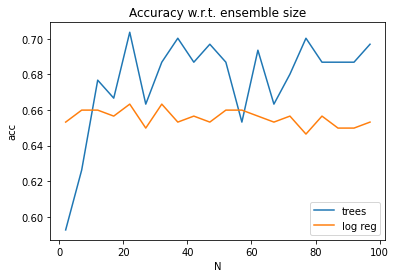

In [32]:
plt.title('Accuracy w.r.t. ensemble size')
plt.xlabel('N')
plt.ylabel('acc')
plt.plot(range(N_min, N_max, step), acc_tree, label='trees')
plt.plot(range(N_min, N_max, step), acc_lr, label='log reg')
plt.legend();

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [33]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
rf_f1, rf_acc = [], []

for N in range(N_min, N_max, step):
    rf = RandomForestClassifier(n_estimators=N).fit(X_train_pca, y_train)
    rf_pred = rf.predict(X_test_pca)
    rf_f1.append(f1_score(y_test, rf_pred, average='weighted'))
    rf_acc.append(accuracy_score(y_test, rf_pred))

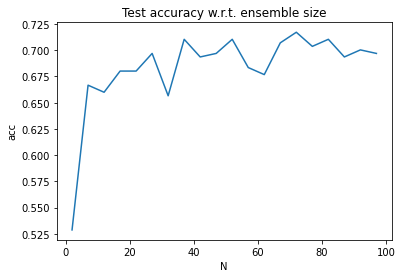

In [36]:
plt.title('Test accuracy w.r.t. ensemble size')
plt.xlabel('N')
plt.ylabel('acc')
plt.plot(range(N_min, N_max, step), rf_acc);

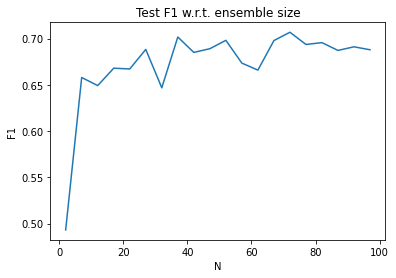

In [37]:
plt.title('Test F1 w.r.t. ensemble size')
plt.xlabel('N')
plt.ylabel('F1')
plt.plot(range(N_min, N_max, step), rf_f1);

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [61]:
# YOUR CODE HERE
def experiment(model_type):
    step = len(X_train_pca) // 10
    acc, f1 = [], []
    
    for i in range(1, 11):
        new_x_train = X_train_pca[:i * step if i < 10 else len(X_train_pca)]
        new_y_train = y_train[:i * step if i < 10 else len(X_train_pca)]
        
        if model_type == 'log_reg':
            model = LogisticRegression(
                C=10, fit_intercept=True, max_iter=400, penalty='l1', 
                random_state=42, solver='saga'
            )
        elif model_type == 'dec_tree':
            model = DecisionTreeClassifier(max_depth=9, random_state=42)
        elif model_type == 'rand_forest':
            model = RandomForestClassifier(n_estimators=75, random_state=42)

        model = model.fit(new_x_train, new_y_train)
        preds = model.predict(X_test_pca)
        
        acc.append(accuracy_score(y_test, preds))
        f1.append(f1_score(y_test, preds, average='weighted'))
        
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    
    for i, metric_name, metric_values in zip([1, 2], ['f1', 'accuracy'], [f1, acc]):
        plt.subplot(1, 2, i)
        plt.title(f'{metric_name} test score for {model_type} w.r.t. train_size')
        plt.xlabel('train_size')
        plt.ylabel('f1')
        plt.xticks(np.linspace(0, 1, 11))
        plt.yticks(np.linspace(0, 1, 11))
        plt.ylim(0, 1)
        plt.grid(which='major', axis='both', color='grey', linestyle='-', linewidth=1)
        plt.plot(np.linspace(0.1, 1, 10), metric_values, linewidth=2)

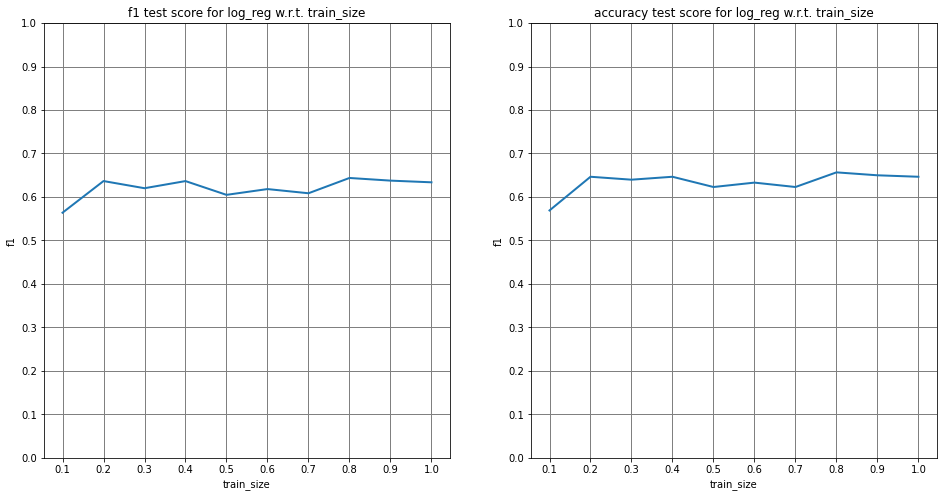

In [62]:
import warnings
warnings.filterwarnings('ignore')

experiment('log_reg')

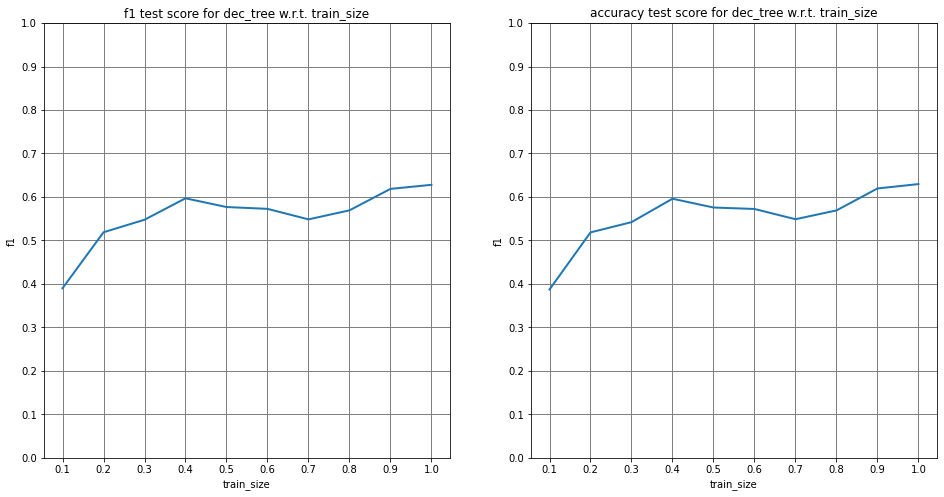

In [63]:
experiment('dec_tree')

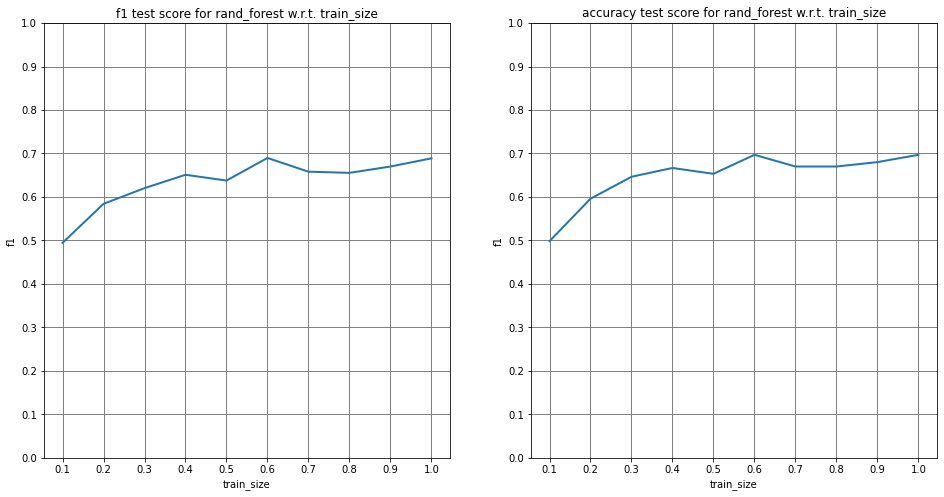

In [64]:
experiment('rand_forest')

## Заключение, выводы, замечания

Что было сделано + результаты:
1. проведена небольшая обработка данных (стандартизация признаков, label encoding таргета)
2. построены модели классификации (логистическая регрессия, решающее дерево, случайный лес)
3. для каждой модели были найдены метрики качества на тренировочных и тестовых данных
    - у лог. регр. f1, accuracy были около 0.635 на тесте и 0.735 на тренировочных
    - у реш. дерева f1, accuracy были около 0.627 на тесте и 0.935 на тренировочных
4. были построены ансамбли типа bagging для лог. регр. и реш. дерева
    - было видно, что при росте числа базовых моделей в ансамбле лог. регр. качество "стабильно", а для базовых моделей типа дерева качество заметно сильнее скакало вверх и вниз
    - но также было видно, что качество ансамбля решающих деревьев при N > 10 стабильно лучше ансамбля логистических регрессий
5. были исследованы способности обучаться у разных типов моделей на разных объемах данных
    - у лог. регр. рост качества заметен лишь в самом начале (с 10% до 20% всей обучающей выборки), дальше качество незначительно колеблется, но стабильного роста или спада не наблюдается, она выдает "стабильное" качество
    - у реш. дерева стабильный рост с 10% до 50% всей обучающей выборки, однако дальше есть небоольшое проседание в качество, после чего снова небольшой рост и выход на новый уровень, выше предыдущих, то есть для дерева большое количество данных определенно хорошая вещь
    - у случайного леса на 10% качество (accuracy, f1_score) было уже 0.5, в то время как у рещ. дерева 0.4, рост наблюдается до 40% всей обучающей выборки, при этом качество все также выше, чем у реш. дерева примерно на 0.06-0.09 (accuracy, f1_score), после этого небольшое плато/спадение качества, а затем, подобно решающему дереву, снова выход на ещё лучшее качество, при этом важно заметить, что проседание качества у случайного леса на 60-80% обучающей выборки меньше, чем у реш. дерева, то есть случайный лес более стабилен и менее подвержен падению качества на тесте при росте размера обучающей выборки


Вывод: из рассмотренных моделей лучшее качество дал случайный лес, к тому же он довольно стабилен и не подвержен падению качества при росте размера обучающей выборки, наборот, с увеличением количества данных он дает постепенно все лучшие результаты.